In [2]:
import pandas as pd
file_path = r'D:\Kartikey\Project\.venv\Preprocessed dataset.csv'

data = pd.read_csv(file_path)
combined_df = data
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.428596,-0.470914,-0.010425,-0.010950,-0.056662,-0.007566,-0.297774,-0.217169,-0.294064,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
1,2.438537,-0.470911,-0.011684,-0.010003,-0.057228,-0.007563,-0.297774,-0.217169,-0.294064,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
2,2.438590,-0.470913,-0.011684,-0.010003,-0.057228,-0.007563,-0.297774,-0.217169,-0.294064,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
3,1.974744,-0.470913,-0.011684,-0.010003,-0.057228,-0.007563,-0.297774,-0.217169,-0.294064,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
4,2.428491,-0.470914,-0.010425,-0.010950,-0.056662,-0.007566,-0.297774,-0.217169,-0.294064,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,-0.454304,-0.470000,-0.007907,-0.009057,-0.047217,-0.007503,-0.268688,0.144683,-0.181562,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
2520794,-0.454304,-0.470905,-0.010425,-0.009057,-0.049862,-0.007415,-0.250179,0.374953,-0.109970,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
2520795,2.595063,-0.470912,-0.010425,-0.010003,-0.054867,-0.007563,-0.264722,-0.315856,-0.245484,-0.186617,...,0.002709,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN
2520796,-0.454304,-0.441151,-0.005390,-0.009057,-0.039662,-0.007459,-0.263400,0.210475,-0.161107,-0.260452,...,0.002698,-0.13337,-0.110882,-0.158458,-0.107114,-0.375777,-0.11608,-0.381137,-0.361764,BENIGN


In [6]:
#Smote to handle class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop(' Label', axis = 1)
y = data[' Label']

#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from scipy.spatial.distance import hamming

# Step 1: Load your dataset
df = combined_df


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost (SAMME)": AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Step 5: Train classifiers and calculate metrics
predictions = {}
metrics_summary = []

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("-" * 50)

    metrics_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Step 6: Calculate Diversity (Pairwise Disagreement)
def calculate_diversity(pred_dict):
    """Calculate disagreement diversity between models' predictions."""
    model_names = list(pred_dict.keys())
    n_models = len(model_names)
    disagreement_scores = []

    for i in range(n_models):
        for j in range(i + 1, n_models):
            pred_1 = pred_dict[model_names[i]]
            pred_2 = pred_dict[model_names[j]]
            disagreement = hamming(pred_1, pred_2)
            disagreement_scores.append(disagreement)
            print(f"Diversity between {model_names[i]} and {model_names[j]}: {disagreement:.4f}")

    avg_diversity = np.mean(disagreement_scores)
    return avg_diversity

# Calculate and print diversity score
diversity_score = calculate_diversity(predictions)
print(f"\nAverage Diversity Score among classifiers: {diversity_score:.4f}")

# Step 7: Display summary metrics for all models
metrics_df = pd.DataFrame(metrics_summary)
print("\nSummary Metrics for all models:")
print(metrics_df)


Training Random Forest...
Random Forest Metrics:
Accuracy: 0.9986
Precision: 0.9985
Recall: 0.9986
F1 Score: 0.9985
Confusion Matrix:
[[627941     51      3      3     36      6      1      1      0      0
     287      0      0      0      0]
 [   186    376      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    24      0  38310      0      2      0      0      0      0      0
       0      0      0      0      0]
 [    13      0      0   3154      9      2      0      0      0      0
       0      0      0      0      0]
 [   164      0      0      4  51882      0      0      0      0      0
       2      0      0      0      0]
 [     5      0      0      1      0   1548      5      0      0      0
       0      0      0      0      0]
 [     5      0      0      0      0      1   1611      0      0      0
       0      0      0      1      0]
 [     1      0      0      0      0      0      0   1726      0      0
       0      0      0  

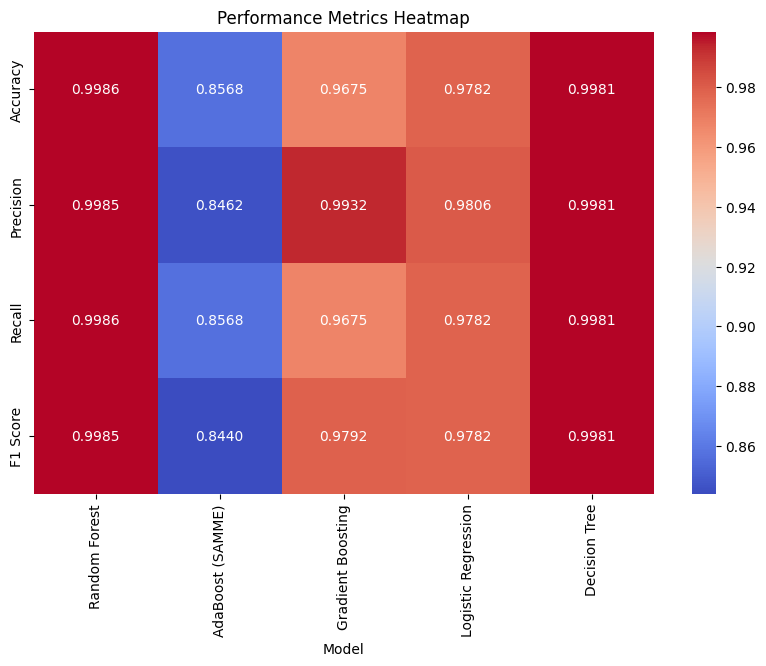

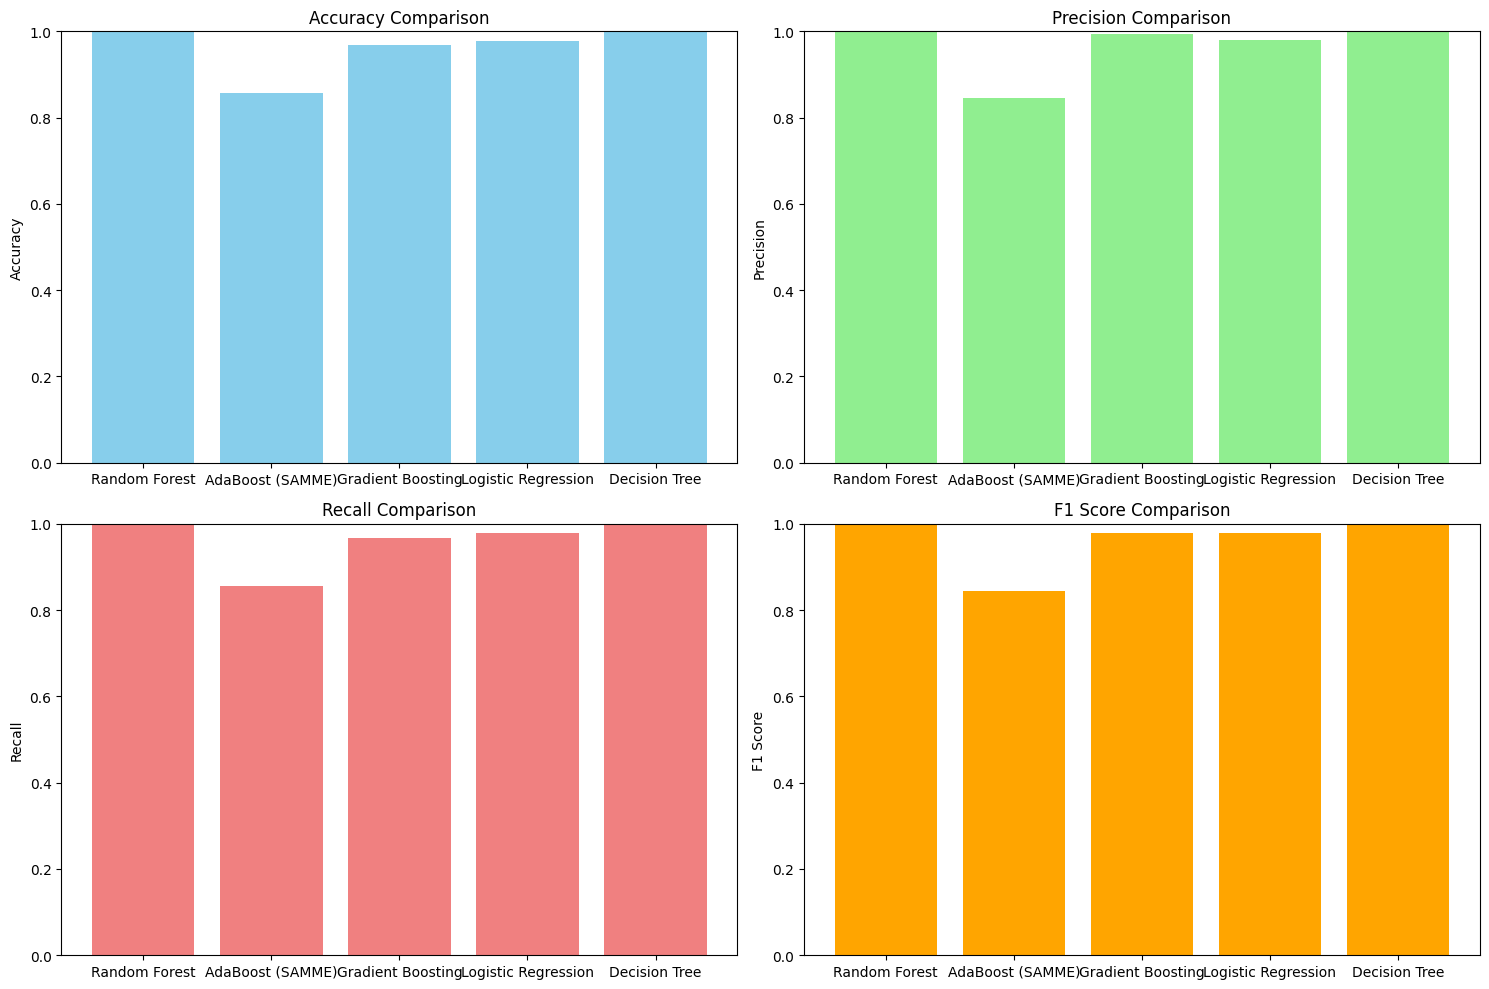

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_df.set_index('Model', inplace=True)

# Normalize the data for better visualization in the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.T, annot=True, cmap='coolwarm', fmt=".4f", cbar=True)
plt.title('Performance Metrics Heatmap')
plt.show()
 
# Plot bar graphs for each of the metrics (Accuracy, Precision, Recall, F1 Score)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].bar(metrics_df.index, metrics_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim([0, 1])

# Precision
axes[0, 1].bar(metrics_df.index, metrics_df['Precision'], color='lightgreen')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_ylim([0, 1])

# Recall
axes[1, 0].bar(metrics_df.index, metrics_df['Recall'], color='lightcoral')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_ylim([0, 1])

# F1 Score
axes[1, 1].bar(metrics_df.index, metrics_df['F1 Score'], color='orange')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

D:\Kartikey\Project\temp\ipykernel_182564\1296753253.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(metrics_df.index[i], metrics_df['Accuracy'][i] + 0.002, f"{metrics_df['Accuracy'][i]:.4f}", ha='center', va='bottom')
D:\Kartikey\Project\temp\ipykernel_182564\1296753253.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(metrics_df.index[i], metrics_df['Precision'][i] + 0.002, f"{metrics_df['Precision'][i]:.4f}", ha='center', va='bottom')
D:\Kartikey\Project\temp\ipykernel_182564\1296753253.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

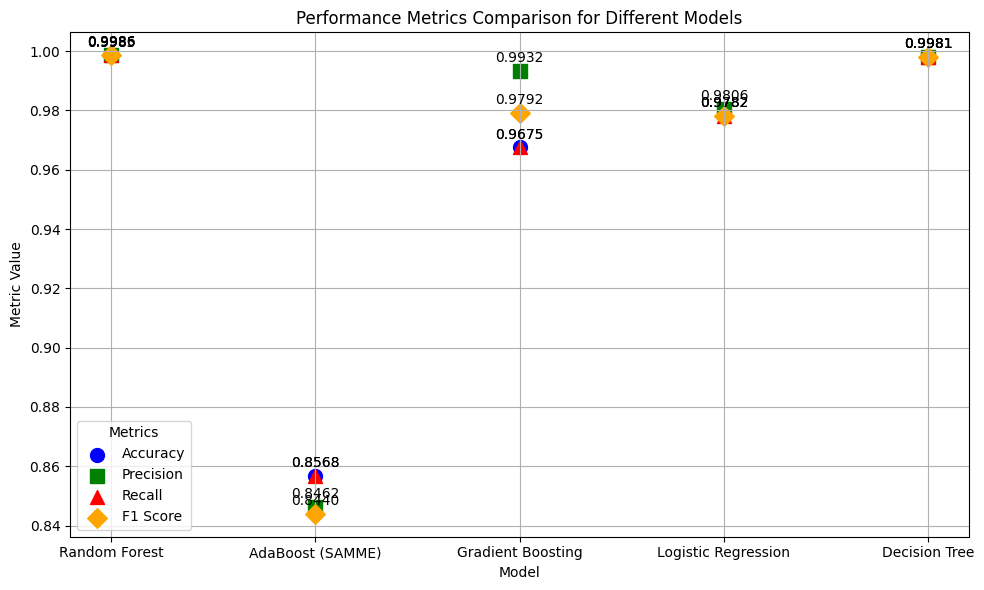

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample summary metrics for all models
metrics_summary = [
    {"Model": "Random Forest", "Accuracy": 0.998601, "Precision": 0.998534, "Recall": 0.998601, "F1 Score": 0.998533},
    {"Model": "AdaBoost (SAMME)", "Accuracy": 0.856802, "Precision": 0.846182, "Recall": 0.856802, "F1 Score": 0.843955},
    {"Model": "Gradient Boosting", "Accuracy": 0.967501, "Precision": 0.993188, "Recall": 0.967501, "F1 Score": 0.979173},
    {"Model": "Logistic Regression", "Accuracy": 0.978170, "Precision": 0.980578, "Recall": 0.978170, "F1 Score": 0.978249},
    {"Model": "Decision Tree", "Accuracy": 0.998081, "Precision": 0.998073, "Recall": 0.998081, "F1 Score": 0.998074}
]

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Set 'Model' as the index
metrics_df.set_index('Model', inplace=True)

# Create a scatter plot for Accuracy, Precision, Recall, and F1 Score
plt.figure(figsize=(10, 6))

# Scatter plot for Accuracy vs Model
plt.scatter(metrics_df.index, metrics_df['Accuracy'], color='blue', label='Accuracy', s=100, marker='o')

# Scatter plot for Precision vs Model
plt.scatter(metrics_df.index, metrics_df['Precision'], color='green', label='Precision', s=100, marker='s')

# Scatter plot for Recall vs Model
plt.scatter(metrics_df.index, metrics_df['Recall'], color='red', label='Recall', s=100, marker='^')

# Scatter plot for F1 Score vs Model
plt.scatter(metrics_df.index, metrics_df['F1 Score'], color='orange', label='F1 Score', s=100, marker='D')

# Adding model names and metrics on the plot
for i, model in enumerate(metrics_df.index):
    plt.text(metrics_df.index[i], metrics_df['Accuracy'][i] + 0.002, f"{metrics_df['Accuracy'][i]:.4f}", ha='center', va='bottom')
    plt.text(metrics_df.index[i], metrics_df['Precision'][i] + 0.002, f"{metrics_df['Precision'][i]:.4f}", ha='center', va='bottom')
    plt.text(metrics_df.index[i], metrics_df['Recall'][i] + 0.002, f"{metrics_df['Recall'][i]:.4f}", ha='center', va='bottom')
    plt.text(metrics_df.index[i], metrics_df['F1 Score'][i] + 0.002, f"{metrics_df['F1 Score'][i]:.4f}", ha='center', va='bottom')

# Set titles and labels
plt.title('Performance Metrics Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(title='Metrics')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


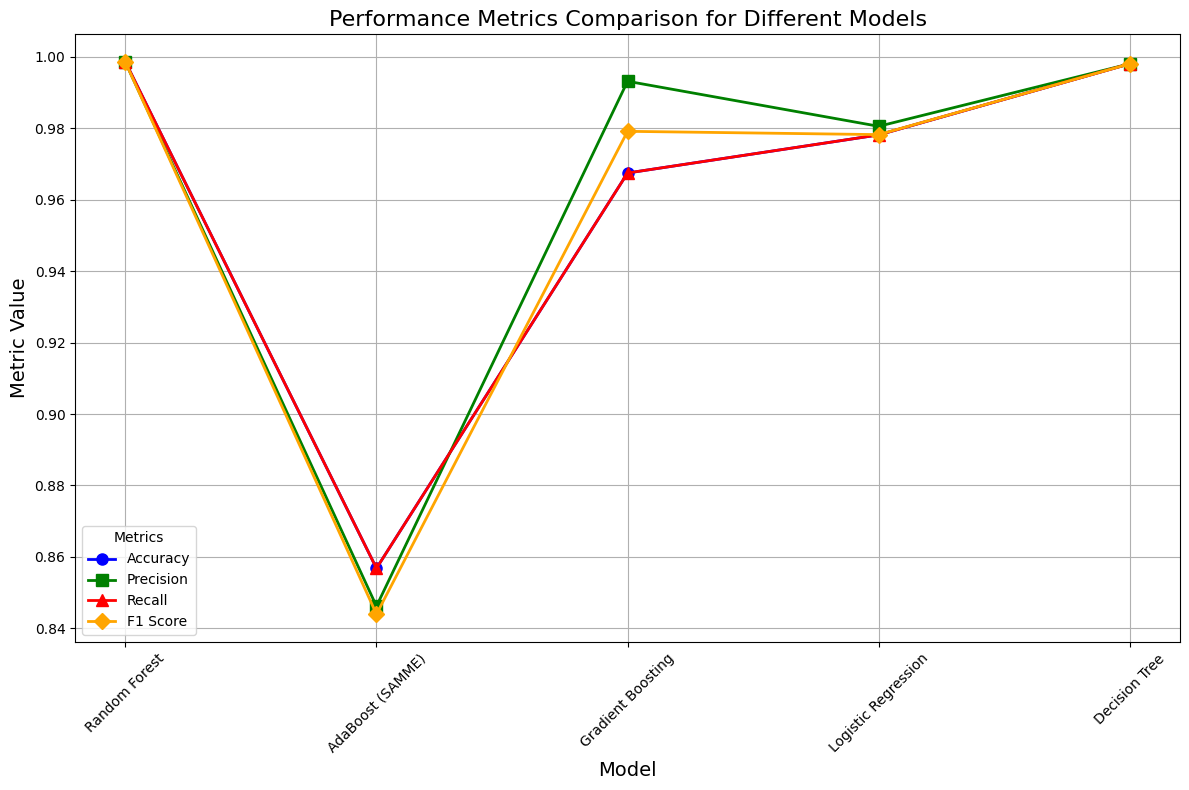

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample summary metrics for all models
metrics_summary = [
    {"Model": "Random Forest", "Accuracy": 0.998601, "Precision": 0.998534, "Recall": 0.998601, "F1 Score": 0.998533},
    {"Model": "AdaBoost (SAMME)", "Accuracy": 0.856802, "Precision": 0.846182, "Recall": 0.856802, "F1 Score": 0.843955},
    {"Model": "Gradient Boosting", "Accuracy": 0.967501, "Precision": 0.993188, "Recall": 0.967501, "F1 Score": 0.979173},
    {"Model": "Logistic Regression", "Accuracy": 0.978170, "Precision": 0.980578, "Recall": 0.978170, "F1 Score": 0.978249},
    {"Model": "Decision Tree", "Accuracy": 0.998081, "Precision": 0.998073, "Recall": 0.998081, "F1 Score": 0.998074}
]

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Set 'Model' as the index
metrics_df.set_index('Model', inplace=True)

# Create a line plot for each metric (Accuracy, Precision, Recall, F1 Score)
plt.figure(figsize=(12, 8))

# Plot each metric as a line graph
plt.plot(metrics_df.index, metrics_df['Accuracy'], label='Accuracy', marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.plot(metrics_df.index, metrics_df['Precision'], label='Precision', marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
plt.plot(metrics_df.index, metrics_df['Recall'], label='Recall', marker='^', color='red', linestyle='-', linewidth=2, markersize=8)
plt.plot(metrics_df.index, metrics_df['F1 Score'], label='F1 Score', marker='D', color='orange', linestyle='-', linewidth=2, markersize=8)

# Adding labels and title
plt.title('Performance Metrics Comparison for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()


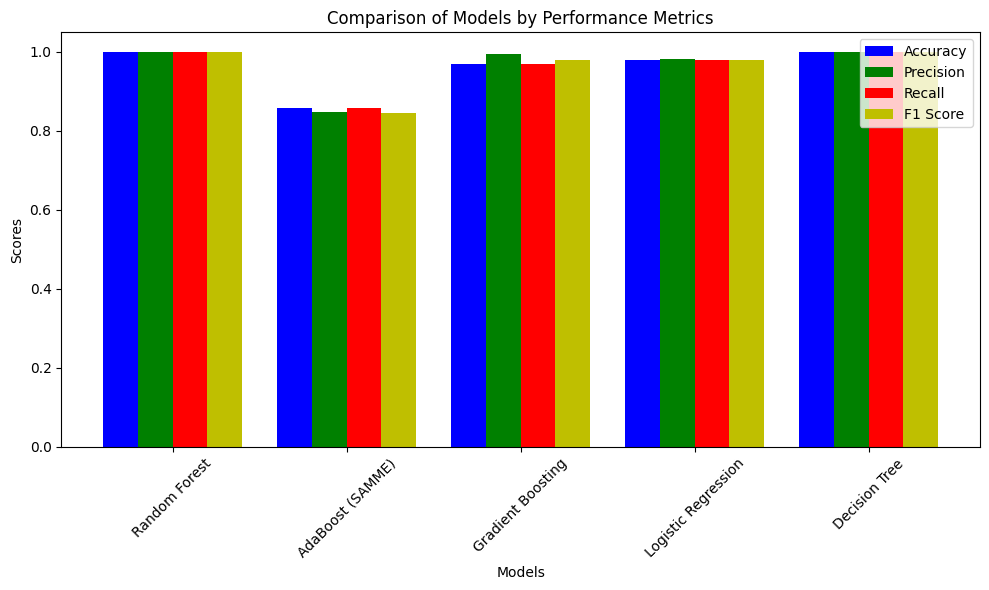

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Random Forest", "AdaBoost (SAMME)", "Gradient Boosting", "Logistic Regression", "Decision Tree"]
accuracy = [0.998601, 0.856802, 0.967501, 0.978170, 0.998081]
precision = [0.998534, 0.846182, 0.993188, 0.980578, 0.998073]
recall = [0.998601, 0.856802, 0.967501, 0.978170, 0.998081]
f1_score = [0.998533, 0.843955, 0.979173, 0.978249, 0.998074]

# X-axis positions for each model
x = np.arange(len(models))

# Bar width
width = 0.2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each metric
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='b')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='g')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='r')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='y')

# Labeling the graph
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models by Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


Explained variance ratio: [0.2149642  0.10263163 0.08686082 0.06055649 0.05139703 0.04398659
 0.03666166 0.0349641  0.03341545 0.02959095 0.0285486  0.02850132
 0.02384084 0.02202343 0.02071017 0.01815379 0.01810268 0.0171886
 0.01434756 0.01368031 0.01297627 0.01246396 0.01118683 0.01044364
 0.00827839]
Total explained variance: 0.96
Number of components: 25
Class distribution before SMOTE:
 Label
BENIGN                        1466728
DoS Hulk                       120794
DDoS                            89678
PortScan                        63446
DoS GoldenEye                    7108
FTP-Patator                      4204
DoS slowloris                    3767
DoS Slowhttptest                 3669
SSH-Patator                      2271
Bot                              1386
Web Attack � Brute Force         1009
Web Attack � XSS                  456
Infiltration                       25
Web Attack � Sql Injection          9
Heartbleed                          8
Name: count, dtype: int64
Cl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from scipy.spatial.distance import hamming

# Step 1: Load your dataset
df = pd.read_csv(r'D:\Kartikey\.venv\Preprocessed dataset.csv')

# Step 2: Define X and y (features and labels)
X = df.drop(' Label', axis=1)  # Assuming 'label' is the target column in the dataset
y = df[' Label']  # Labels including both main classes and subclasses

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost (SAMME)": AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Step 5: Train classifiers and calculate metrics
predictions = {}
metrics_summary = []
classwise_metrics = []

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred
    
    # Calculate evaluation metrics for the entire dataset
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Print model metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("-" * 50)

    metrics_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Calculate class-wise metrics
    class_report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in class_report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
            classwise_metrics.append({
                'Model': name,
                'Class': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1 Score': metrics['f1-score']
            })

# Step 6: Calculate Diversity (Pairwise Disagreement)
def calculate_diversity(pred_dict):
    """Calculate disagreement diversity between models' predictions."""
    model_names = list(pred_dict.keys())
    n_models = len(model_names)
    disagreement_scores = []

    for i in range(n_models):
        for j in range(i + 1, n_models):
            pred_1 = pred_dict[model_names[i]]
            pred_2 = pred_dict[model_names[j]]
            disagreement = hamming(pred_1, pred_2)
            disagreement_scores.append(disagreement)
            print(f"Diversity between {model_names[i]} and {model_names[j]}: {disagreement:.4f}")

    avg_diversity = np.mean(disagreement_scores)
    return avg_diversity

# Calculate and print diversity score
diversity_score = calculate_diversity(predictions)
print(f"\nAverage Diversity Score among classifiers: {diversity_score:.4f}")

# Step 7: Display summary metrics for all models
metrics_df = pd.DataFrame(metrics_summary)
print("\nSummary Metrics for all models:")
print(metrics_df)

# Step 8: Display class-wise metrics for each subclass (per model)
classwise_metrics_df = pd.DataFrame(classwise_metrics)
print("\nClass-wise Metrics for each subclass:")
print(classwise_metrics_df)


Training Random Forest...
Random Forest Metrics:
Accuracy: 0.9986
Precision: 0.9985
Recall: 0.9986
F1 Score: 0.9985
Confusion Matrix:
[[627941     51      3      3     36      6      1      1      0      0
     287      0      0      0      0]
 [   186    376      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    24      0  38310      0      2      0      0      0      0      0
       0      0      0      0      0]
 [    13      0      0   3154      9      2      0      0      0      0
       0      0      0      0      0]
 [   164      0      0      4  51882      0      0      0      0      0
       2      0      0      0      0]
 [     5      0      0      1      0   1548      5      0      0      0
       0      0      0      0      0]
 [     5      0      0      0      0      1   1611      0      0      0
       0      0      0      1      0]
 [     1      0      0      0      0      0      0   1726      0      0
       0      0      0  

c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Training Gradient Boosting...
